average =  1.1875000000000002


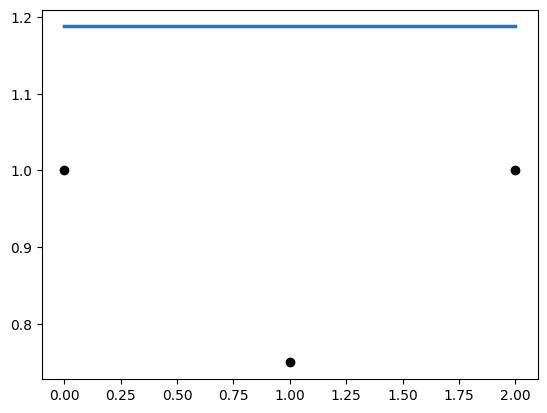

In [54]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

def f(x, a):
    return a

n = 3

x = np.zeros(n, dtype=float)
y = np.zeros(n, dtype=float)
cov = np.zeros((n,n), dtype=float)

for i in range(n):
    x[i] = i
    y[i] = 1
    cov[i][i] = 1
    if i < n-1:
      cov [i][i+1] = 0.65
    if i > 0:
      cov [i][i-1] = 0.65

y[1]=0.75

#Michael Schmelling, CERN PPE 94-185, https://cds.cern.ch/record/273386/files/ppe-94-185.pdf
cov_inv = np.linalg.inv(cov)
average = np.sum( np.dot(cov_inv,y)) / np.sum(cov_inv)
print("average = ", average)

params, pcov = curve_fit(f, x, y, sigma = cov)
y_res = f(x, *params) - y
y_f = y_res + y 

plt.plot(x, y, 'ko', label="data")
plt.plot(x, y_f, linewidth=2.5, label="fitted curve")


In [2]:

params, pcov = curve_fit(f, x, y, sigma = cov)
y_res = f(x, *params) - y
print(y_res)

plt.plot(x, y, 'ko', label="data")
plt.plot(x, f(x, *params), linewidth=2.5, label="fitted curve")
plt.vlines(x, y, f(x, *params), 'r')

#for k in range(3):
#    plt.annotate(s=r"$e_{%d}$" % (k+1), xy=(x[k]-0.05, y[k]+0.5*res[k]), ha='right')

plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.grid()
plt.legend()
plt.show()

NameError: ignored